## 🎯 Objetivo General

Explorar y analizar los datos históricos del Super Bowl para obtener información relevante sobre la audiencia televisiva, los resultados de los partidos y los espectáculos de medio tiempo.

## 🛠️ Metodología

Para lograr este objetivo, se realizará lo siguiente:

- Se analizará la evolución de la audiencia televisiva a lo largo del tiempo para determinar si ha habido un aumento sostenido.
- Se evaluarán los resultados de los partidos para identificar cuántos terminaron con una diferencia de puntos superior a 40.
- Se examinarán los espectáculos de medio tiempo para identificar qué artista interpretó la mayor cantidad de canciones.

Los resultados se almacenarán en variables específicas para facilitar su interpretación y uso posterior en visualizaciones o reportes.



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar datos 
df = pd.read_csv('../Data/Processesd/super_bowls_clean.csv')
#Mostrar las primeras filas del DataFrame
display(df.head())



,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,...,coach_loser,combined_pts,difference_pts,network,avg_us_viewers,rating_household,share_household,ad_cost,musician,num_songs
0,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,...,Hank Stram,45,25,CBS,26750000,22.6,43,42500,University of Arizona Symphonic Marching Band,NaN
1,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,...,Hank Stram,45,25,CBS,26750000,22.6,43,42500,Grambling State University Tiger Marching Band,NaN
2,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,...,Hank Stram,45,25,CBS,26750000,22.6,43,42500,Al Hirt,NaN
3,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,...,Hank Stram,45,25,NBC,24430000,18.5,36,37500,University of Arizona Symphonic Marching Band,NaN
4,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,...,Hank Stram,45,25,NBC,24430000,18.5,36,37500,Grambling State University Tiger Marching Band,NaN


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              137 non-null    datetime64[ns]
 1   super_bowl        137 non-null    int64         
 2   venue             137 non-null    object        
 3   city              137 non-null    object        
 4   state             137 non-null    object        
 5   attendance        137 non-null    int64         
 6   team_winner       137 non-null    object        
 7   winning_pts       137 non-null    int64         
 8   qb_winner_1       137 non-null    object        
 9   coach_winner      137 non-null    object        
 10  team_loser        137 non-null    object        
 11  losing_pts        137 non-null    int64         
 12  qb_loser_1        137 non-null    object        
 13  coach_loser       137 non-null    object        
 14  combined_pts      137 non-

**¿Ha aumentado la audiencia televisiva con el tiempo? Guarde su respuesta como una variable booleana llamada .viewership_increased**

In [16]:
#Verificar si la audiencia ha aumentado con el tiempo
pivot_table = df.pivot_table(index=['date','super_bowl'], values='avg_us_viewers').reset_index()
display(pivot_table)

,date,super_bowl,avg_us_viewers
0,1967-01-15,1,25590000.0
1,1968-01-14,2,39120000.0
2,1969-01-12,3,41660000.0
3,1970-01-11,4,44270000.0
4,1971-01-17,5,46040000.0
5,1972-01-16,6,56640000.0
6,1973-01-14,7,53320000.0
7,1974-01-13,8,51700000.0
8,1975-01-12,9,56050000.0
9,1976-01-18,10,57710000.0


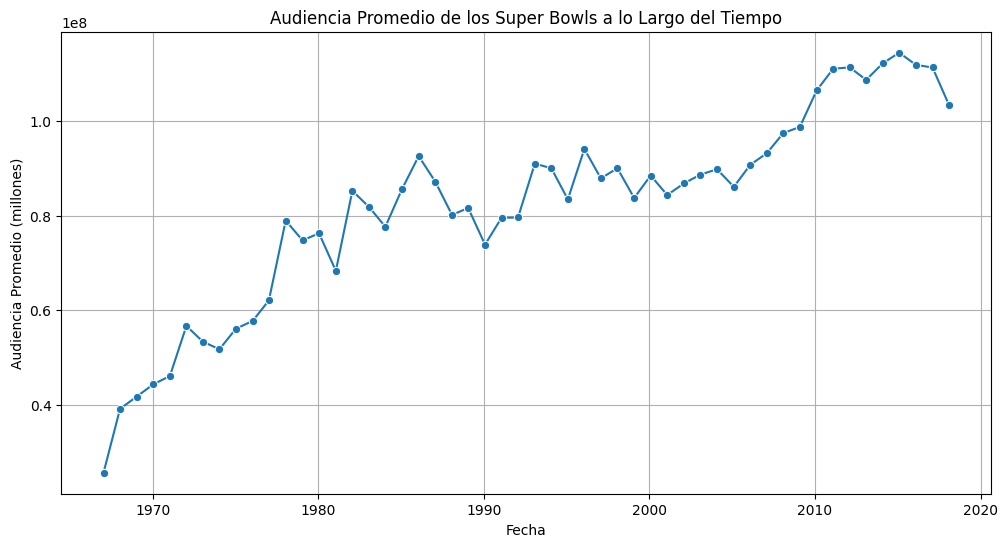

In [17]:
#Graficar la audiencia a lo largo del tiempo
plt.figure(figsize=(12,6))
sns.lineplot(data=pivot_table, x='date', y='avg_us_viewers', marker='o')
plt.title('Audiencia Promedio de los Super Bowls a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Audiencia Promedio (millones)')
plt.grid()
plt.show()

¿Cuántos partidos terminaron con una diferencia de puntos superior a 40? Guarde su respuesta como un número entero llamado .difference

In [34]:
difference = len(df.query("difference_pts >= 40"))
print("Diferencia de puntos que fueron superiores a 40 puntos fueron", difference)

df_filtrado = df.query("difference_pts >= 40")[['date','difference_pts','team_winner']].sort_values(by="difference_pts", ascending=False).reset_index()
display(df_filtrado)


Diferencia de puntos que fueron superiores a 40 puntos fueron 6


,index,date,difference_pts,team_winner
0,47,1990-01-28,45,San Francisco 49ers
1,48,1990-01-28,45,San Francisco 49ers
2,49,1990-01-28,45,San Francisco 49ers
3,50,1990-01-28,45,San Francisco 49ers
4,51,1990-01-28,45,San Francisco 49ers
5,52,1990-01-28,45,San Francisco 49ers


¿Quién interpretó más canciones en los espectáculos de medio tiempo del Super Bowl? Guarde su respuesta como una cadena llamada .most_songs

In [ ]:
most_songs = df.groupby('musician')['num_songs'].sum().sort_values(ascending=False)   

print(most_songs)

musician
Justin Timberlake                                 12.0
Diana Ross                                        10.0
Beyoncé                                           10.0
Bruno Mars                                         9.0
Grambling State University Tiger Marching Band     9.0
                                                  ... 
United States Air Force Academy Cadet Chorale      0.0
University of Michigan Marching Band               0.0
Woody Herman                                       0.0
University of Texas Longhorn Band                  0.0
Up with People                                     0.0
Name: num_songs, Length: 111, dtype: float64


In [43]:
most_songs = df.groupby('musician', as_index=False)['num_songs'].sum()
most_songs = most_songs.sort_values(by='num_songs', ascending=False)
display(most_songs)




,musician,num_songs
36,Justin Timberlake,12.0
18,Diana Ross,10.0
5,Beyoncé,10.0
10,Bruno Mars,9.0
28,Grambling State University Tiger Marching Band,9.0
...,...,...
98,United States Air Force Academy Cadet Chorale,0.0
101,University of Michigan Marching Band,0.0
106,Woody Herman,0.0
103,University of Texas Longhorn Band,0.0


mostrar los primero 5 musicos con mas canciones interpretadas en el medio tiempo del super bowl


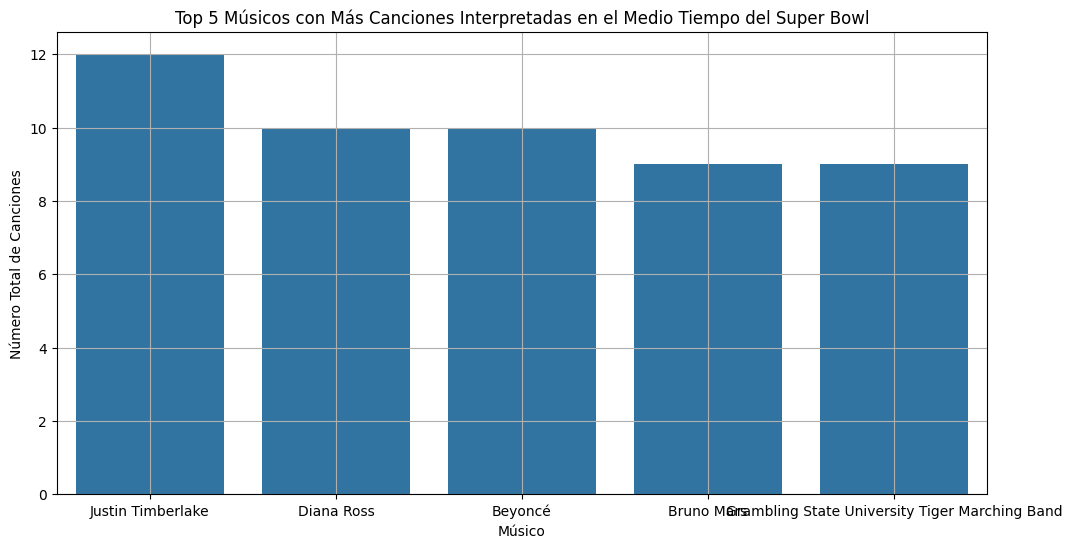

In [44]:
print('mostrar los primero 5 musicos con mas canciones interpretadas en el medio tiempo del super bowl')
plt.figure(figsize=(12,6))
sns.barplot(data=most_songs.head(5), x='musician', y='num_songs')
plt.title('Top 5 Músicos con Más Canciones Interpretadas en el Medio Tiempo del Super Bowl')
plt.xlabel('Músico')
plt.ylabel('Número Total de Canciones')
plt.grid()
plt.show()
